## Librerías:

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import copy
import rasterio
import zipfile

Para los datos Landsat 8 utilizamos las siguientes fórmulas de MNDWI y NDVI:  

*NDWI = (Verde – SWIR)/(Verde + SWIR)*   
**NDWI = (Banda 3 – Banda 6)/(Banda 3 + Banda 6)**  
Los valores del NDWI corresponden a los siguientes rangos:  
0,2 – 1 – Superficie del agua,  
0,0 – 0,2 – Inundación, humedad,  
-0,3 – 0,0 – Sequía moderada, superficies sin agua,  
-1 – -0,3 – Sequía, superficies sin agua  

*NDVI = (Rojo – NIR)/(Rojo + NIR)*  
**NDVI = (Banda 5 - Banda 4)/(Banda 5 + Banda 4)**  


## Carga de imagenes

In [43]:
imagenes = zipfile.ZipFile('Los-Molinos_2023-05-14_6_all_bands.zip', 'r')
imgfile = imagenes.read('2023-05-14.SR_B3.tif')
with zipfile.ZipFile('Los-Molinos_2023-05-14_6_all_bands.zip') as myzip:
    myzip.extractall('Los-Molinos_2023-05-14_6_all_bands/')

In [44]:
# Cargamos la imagen y la dividimos por 255 para normalizarla 
path = 'Los-Molinos_2023-05-14_6_all_bands/'
B3= mpimg.imread(path + '2023-05-14.SR_B3.tif') / 255
B4= mpimg.imread(path + '2023-05-14.SR_B4.tif') / 255
B5= mpimg.imread(path + '2023-05-14.SR_B5.tif') / 255
B6= mpimg.imread(path + '2023-05-14.SR_B6.tif') / 255


### Exploración de las imágenes

Dimensiones:

In [ ]:
# Obtenemos las dimensiones
print("Dimensiones de imagen B3:")
[filas, columnas] = B3.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

print("Dimensiones de imagen B4:")
[filas, columnas] = B4.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

print("Dimensiones de imagen B5:")
[filas, columnas] = B5.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

print("Dimensiones de imagen B6:")
[filas, columnas] = B6.shape
print("        Filas = ", filas, "; Columnas = ", columnas)

# Mostramos qué tipo de objeto son las bandas
print('\nTipo de objeto: ', type(B3), type(B4), type(B5), type(B6))



Sistema de referencia

In [71]:
print(rasterio.open(path + '2023-05-14.SR_B3.tif').crs) ##ME DA NONE: VER BIEN

None


Visualizamos las imagenes de las bandas en tonos de grises

In [ ]:
# Armamos la figura
plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
# Banda 3
plt.subplot(2,2,1)
plt.title('Banda 3 - Verde')
plt.imshow(B3, cmap='gray')
# Banda 4
plt.subplot(2,2,2)
plt.title('Banda 4 - Rojo')
plt.imshow(B4, cmap='gray')
# Banda 5
plt.subplot(2,2,3)
plt.title('Banda 5 - NIR')
plt.imshow(B5, cmap='gray')
# Banda 6
plt.subplot(2,2,4)
plt.title('Banda 6 - SWIR')
plt.imshow(B6, cmap='gray')


Otra forma de ver las imágenes usando rasterio

"\n# Armamos la figura\nplt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')\nplt.subplot(2,2,1)\nplt.title('Banda 3 - Verde')\nplot.show(B3)\nplt.subplot(2,2,2)\nplt.title('Banda 4 - Rojo')\nplot.show(B4)\nplt.subplot(2,2,3)\nplt.title('Banda 5 - NIR')\nplot.show(B5)\nplt.subplot(2,2,4)\nplt.title('Banda 6 - SWIR')\nplot.show(B6)\n"

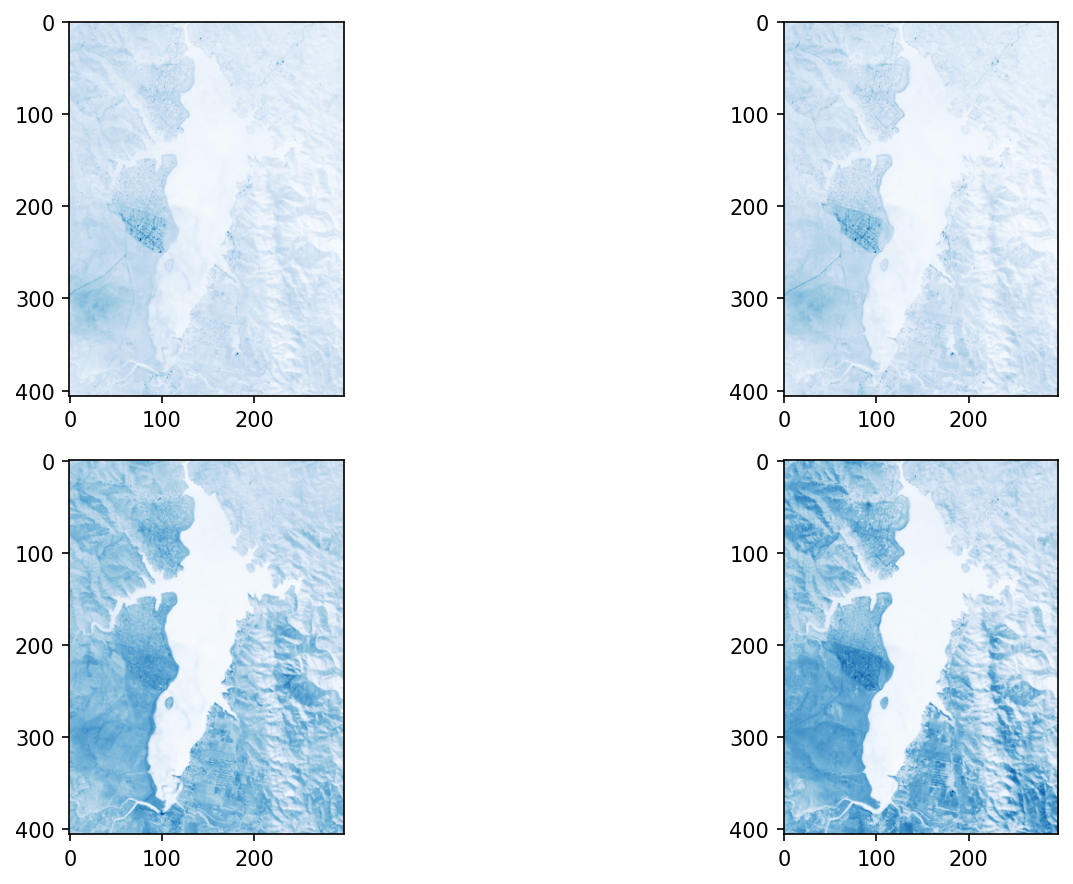

In [91]:
from rasterio import plot
fig, axs = plt.subplots(2,2, figsize=(12, 6), dpi= 150, facecolor='w', edgecolor='k')
axs = axs.ravel()
plot.show(B3, ax=axs[0], cmap='Blues')
plot.show(B4, ax=axs[1], cmap='Blues')
plot.show(B5, ax=axs[2], cmap='Blues')
plot.show(B6, ax=axs[3], cmap='Blues')
fig.tight_layout()
'''
# Armamos la figura
plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.title('Banda 3 - Verde')
plot.show(B3)
plt.subplot(2,2,2)
plt.title('Banda 4 - Rojo')
plot.show(B4)
plt.subplot(2,2,3)
plt.title('Banda 5 - NIR')
plot.show(B5)
plt.subplot(2,2,4)
plt.title('Banda 6 - SWIR')
plot.show(B6)
'''

Histograma de las imágenes

Text(0.5, 1.0, 'Banda 6 - SWIR')

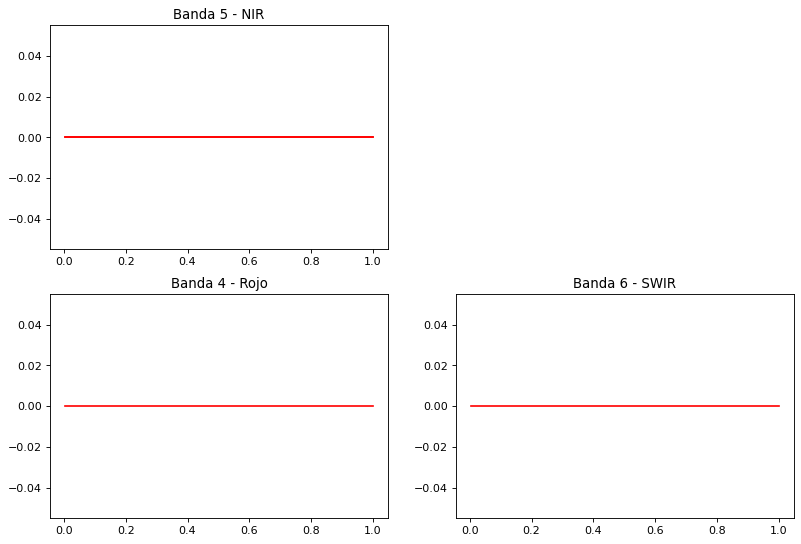

In [60]:
# Histogramas de las bandas
B3_hist, B3_edges = np.histogram(B3, bins=256, range=[0,1])
B4_hist, B4_edges = np.histogram(B4, bins=256, range=[0,1])
B5_hist, B5_edges = np.histogram(B5, bins=256, range=[0,1])
B6_hist, B6_edges = np.histogram(B6, bins=256, range=[0,1])
# Creamos la figura
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
# Subplot 1
plt.subplot(2,2,1)
plt.plot(B3_edges[1:], B3_hist,'r')
plt.title('B3 - Verde')
# Subplot 2
plt.subplot(2,2,3)
plt.plot(B4_edges[1:], B4_hist,'r')
plt.title('Banda 4 - Rojo')
# Subplot 3
plt.subplot(2,2,1)
plt.plot(B5_edges[1:], B5_hist,'r')
plt.title('Banda 5 - NIR')
# Subplot 4
plt.subplot(2,2,4)
plt.plot(B6_edges[1:], B6_hist,'r')
plt.title('Banda 6 - SWIR')


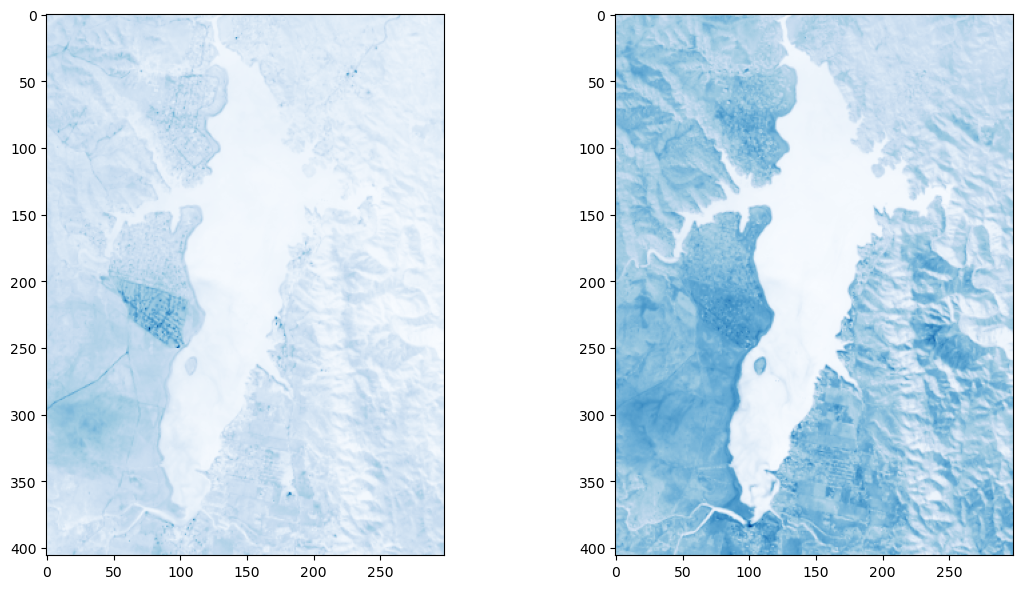

In [72]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(B4, ax=ax1, cmap='Blues')
plot.show(B5, ax=ax2, cmap='Blues')
fig.tight_layout()